## <font color=blue>Diabetes dataset<font>

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from tqdm import tqdm

# df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:500,2:]
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [2]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [3]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,8,26,17,14,18,73,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,1,1,7,3,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,53990,60234,57494,17756,40256,49949,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [4]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
**************************************************
gender [Female, Male, Unknown/Invalid]
Categories (3, object): [Female, Male, Unknown/Invalid]
**************************************************
age [[0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100)]
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]
**************************************************
weight [?, [75-100), [50-75), [0-25), [100-125), [25-50), [125-150), [175-200), [150-175), >200]
Categories (10, object): [?, [75-100), [50-75), [0-25), ..., [125-150), [175-200), [150-175), >200]
**************************************************
admission_type_id [6, 1, 2, 3, 4, 5, 8, 7]
Categories (8, object): [6, 1, 2, 3, 4, 5, 8, 7]
**************************************************
discharge_disposition_

### <font color =blue>1. remove columns with missing data</font>

In [5]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30


### <font color=blue> 2. remove incomplete columns and rows </font>

In [6]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(98052, 45)

In [7]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [8]:
show_unique(df)

race [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100), [0-10)]
Categories (10, object): [[10-20), [20-30), [30-40), [40-50), ..., [70-80), [80-90), [90-100), [0-10)]
**************************************************
admission_type_id [1, 2, 3, 6, 4, 5, 8, 7]
Categories (8, object): [1, 2, 3, 6, 4, 5, 8, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 2, 5, ..., 15, 24, 28, 19, 27]
Length: 26
Categories (26, object): [1, 3, 6, 2, ..., 24, 28, 19, 27]
**************************************************
admission_source_id [7, 2, 4, 1, 5, ..., 10, 22, 11, 25, 13]
Length: 17
Categories (17, object): [7, 2, 4, 1, ..., 22, 11, 

### <font color = blue>3. categorical variables</font>

In [9]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [10]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'acetohexamide_cat',
 'diag_1_cat',
 'admission_source_id_cat',
 'chlorpropamide_cat',
 'admission_type_id_cat',
 'nateglinide_cat',
 'glipizide_cat',
 'troglitazone_cat',
 'insulin_cat',
 'discharge_disposition_id_cat',
 'glipizide-metformin_cat',
 'change_cat',
 'diag_2_cat',
 'tolazamide_cat',
 'tolbutamide_cat',
 'max_glu_serum_cat',
 'glimepiride-pioglitazone_cat',
 'age_cat',
 'A1Cresult_cat',
 'gender_cat',
 'diabetesMed_cat',
 'diag_3_cat',
 'pioglitazone_cat',
 'miglitol_cat',
 'metformin-pioglitazone_cat',
 'acarbose_cat',
 'glyburide_cat',
 'glyburide-metformin_cat',
 'metformin_cat',
 'repaglinide_cat',
 'glimepiride_cat',
 'race_cat',
 'rosiglitazone_cat']

In [11]:
df['readmitted'].head(11)

1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [12]:
df['readmitted_cat'].head(11)

1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    1
11    0
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [13]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [15]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,...,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat,rosiglitazone_cat
71878,5,50,1,23,0,0,0,9,0,34,...,0,0,0,1,1,1,1,1,3,1
58959,7,70,2,32,0,0,3,9,0,204,...,0,0,0,1,1,1,1,1,3,1


In [16]:
y_train.head(2)

71878    0
58959    2
Name: readmitted_cat, dtype: int8

In [17]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,...,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat,rosiglitazone_cat
101706,3,66,1,18,0,0,1,9,0,193,...,0,0,0,2,1,1,1,1,3,1
73363,2,4,0,11,1,0,1,7,0,409,...,0,0,0,1,1,1,1,1,1,1


In [18]:
y_test.head(2)

101706    1
73363     1
Name: readmitted_cat, dtype: int8

### <font color=blue>5. min max scaling</font>

In [19]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
acetohexamide_cat                int8
diag_1_cat                      int16
admission_source_id_cat          int8
chlorpropamide_cat               int8
admission_type_id_cat            int8
nateglinide_cat                  int8
glipizide_cat                    int8
troglitazone_cat                 int8
insulin_cat                      int8
discharge_disposition_id_cat     int8
glipizide-metformin_cat          int8
change_cat                       int8
diag_2_cat                      int16
tolazamide_cat                   int8
tolbutamide_cat                  int8
max_glu_serum_cat                int8
glimepiride-pioglitazone_cat     int8
age_cat                          int8
A1Cresult_ca

#### before scale

In [20]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,...,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat,rosiglitazone_cat
count,73539.000000,73539.000000,73539.000000,73539.0000,73539.000000,73539.000000,73539.000000,73539.000000,73539.0,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,4.427678,43.155305,1.348998,16.0989,0.372496,0.201988,0.646229,7.509974,0.0,255.434518,...,0.000422,0.000014,0.003155,1.101837,1.006772,1.195121,1.015801,1.050232,2.657474,1.063490
std,3.000109,19.748888,1.704406,8.0961,1.254258,0.930706,1.264435,1.833319,0.0,122.229602,...,0.024178,0.003688,0.059148,0.344832,0.083329,0.434937,0.136970,0.240641,0.863144,0.254166
min,1.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,3.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,11.0000,0.000000,0.000000,0.000000,6.000000,0.0,190.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,4.000000,44.000000,1.000000,15.0000,0.000000,0.000000,0.000000,8.000000,0.0,228.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
75%,6.000000,57.000000,2.000000,20.0000,0.000000,0.000000,1.000000,9.000000,0.0,350.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,14.000000,129.000000,6.000000,79.0000,42.000000,76.000000,21.000000,16.000000,0.0,716.000000,...,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000


In [21]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,...,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat,rosiglitazone_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,...,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,4.405010,43.127932,1.355852,16.181659,0.388039,0.203892,0.648799,7.518460,0.000041,255.717293,...,0.000571,0.0,0.003386,1.101456,1.006976,1.196263,1.015420,1.050585,2.663525,1.061314
std,2.971848,19.600328,1.720647,8.145418,1.366935,0.978576,1.290618,1.829952,0.006387,122.077590,...,0.029953,0.0,0.062163,0.342456,0.083720,0.435117,0.134005,0.241135,0.853947,0.251371
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,190.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,225.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,350.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,16.000000,16.000000,1.000000,715.000000,...,3.000000,0.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000


In [22]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

#### after scale

In [23]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,admission_source_id_cat,chlorpropamide_cat,admission_type_id_cat,nateglinide_cat,glipizide_cat,troglitazone_cat,insulin_cat,discharge_disposition_id_cat,glipizide-metformin_cat,change_cat
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.0,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,0.263668,0.329338,0.224833,0.193576,0.008869,0.002658,0.030773,0.346921,0.0,0.356752,0.333784,0.333637,0.146428,0.002597,0.373838,0.000027,0.466406,0.210068,0.000122,0.540040
std,0.230778,0.154288,0.284068,0.103796,0.029863,0.012246,0.060211,0.141025,0.0,0.170712,0.246454,0.010921,0.205807,0.032113,0.121723,0.005215,0.278901,0.267686,0.011062,0.498398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.234375,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.0,0.265363,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000
50%,0.230769,0.335938,0.166667,0.179487,0.000000,0.000000,0.000000,0.384615,0.0,0.318436,0.533333,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,1.000000
75%,0.384615,0.437500,0.333333,0.243590,0.000000,0.000000,0.047619,0.461538,0.0,0.488827,0.533333,0.333333,0.285714,0.000000,0.333333,0.000000,0.666667,0.520000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
X_train.iloc[:,21:40].describe()

,tolazamide_cat,tolbutamide_cat,max_glu_serum_cat,glimepiride-pioglitazone_cat,age_cat,A1Cresult_cat,gender_cat,diabetesMed_cat,diag_3_cat,pioglitazone_cat,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,0.000340,0.000231,0.661318,0.000014,0.680076,0.631928,0.461850,0.766355,0.256214,0.357221,0.000141,0.000014,0.001052,0.367279,0.335591,0.398374,0.338600,0.350077,0.414369
std,0.018435,0.015203,0.104091,0.003688,0.173289,0.172620,0.498546,0.423152,0.174087,0.090347,0.008059,0.003688,0.019716,0.114944,0.027776,0.144979,0.045657,0.080214,0.215786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.666667,0.000000,0.555556,0.666667,0.000000,1.000000,0.114068,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
50%,0.000000,0.000000,0.666667,0.000000,0.666667,0.666667,0.000000,1.000000,0.230672,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
75%,0.000000,0.000000,0.666667,0.000000,0.777778,0.666667,1.000000,1.000000,0.346008,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train.describe()

count    73539.000000
mean         1.423068
std          0.684500
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

In [26]:
X_test.shape

(24513, 41)

In [27]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,acetohexamide_cat,diag_1_cat,admission_source_id_cat,chlorpropamide_cat,admission_type_id_cat,nateglinide_cat,glipizide_cat,troglitazone_cat,insulin_cat,discharge_disposition_id_cat,glipizide-metformin_cat,change_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,0.261924,0.329124,0.225975,0.194637,0.009239,0.002683,0.030895,0.347574,0.000041,0.357147,0.335291,0.333605,0.145188,0.002380,0.374359,0.000041,0.468840,0.208241,0.000163,0.532779
std,0.228604,0.153128,0.286775,0.104428,0.032546,0.012876,0.061458,0.140766,0.006387,0.170499,0.246326,0.009983,0.204768,0.031561,0.121854,0.006387,0.282084,0.266952,0.012773,0.498935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.242188,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.000000,0.265363,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000
50%,0.230769,0.335938,0.166667,0.179487,0.000000,0.000000,0.000000,0.384615,0.000000,0.314246,0.533333,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,1.000000
75%,0.384615,0.437500,0.333333,0.243590,0.000000,0.000000,0.047619,0.461538,0.000000,0.488827,0.533333,0.333333,0.285714,0.000000,0.333333,0.000000,0.666667,0.520000,0.000000,1.000000
max,1.000000,1.023438,1.000000,1.025641,0.952381,0.828947,0.761905,1.000000,1.000000,0.998603,1.066667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_test.iloc[:,21:40].describe()

,tolazamide_cat,tolbutamide_cat,max_glu_serum_cat,glimepiride-pioglitazone_cat,age_cat,A1Cresult_cat,gender_cat,diabetesMed_cat,diag_3_cat,pioglitazone_cat,miglitol_cat,metformin-pioglitazone_cat,acarbose_cat,glyburide_cat,glyburide-metformin_cat,metformin_cat,repaglinide_cat,glimepiride_cat,race_cat
count,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,0.000530,0.000204,0.661051,0.0,0.682450,0.632277,0.459144,0.774813,0.256932,0.358136,0.000190,0.0,0.001129,0.367152,0.335659,0.398754,0.338473,0.350195,0.415881
std,0.024732,0.014281,0.103387,0.0,0.173050,0.172127,0.498338,0.417714,0.172971,0.091878,0.009984,0.0,0.020721,0.114152,0.027907,0.145039,0.044668,0.080378,0.213487
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001267,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.666667,0.0,0.555556,0.666667,0.000000,1.000000,0.114068,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
50%,0.000000,0.000000,0.666667,0.0,0.666667,0.666667,0.000000,1.000000,0.230672,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
75%,0.000000,0.000000,0.666667,0.0,0.777778,0.666667,1.000000,1.000000,0.344740,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.500000
max,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.993663,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_test.describe()

count    24513.000000
mean         1.414433
std          0.687174
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

## <font color=green> Baseline</font>

In [30]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.54
test accuracy: 0.53
CPU times: user 8.88 ms, sys: 39 µs, total: 8.92 ms
Wall time: 8.46 ms


<IPython.core.display.Javascript object>


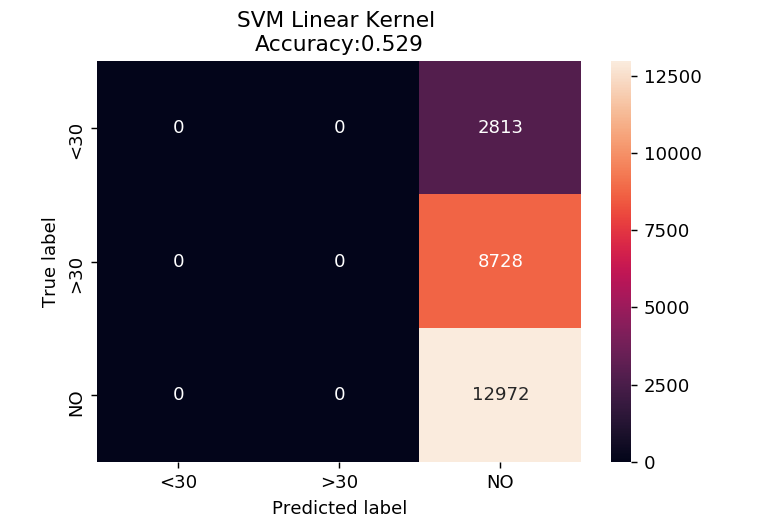

Micro-averaged precision = 0.53 (treat instances equally)
Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.53 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.00      0.00      0.00      8728
          2       0.53      1.00      0.69     12972

avg / total       0.28      0.53      0.37     24513



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
def plot_confusion(clf):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc))

plot_confusion(d_major)

[LibLinear]training accuracy: 0.56
test accuracy: 0.56


<IPython.core.display.Javascript object>


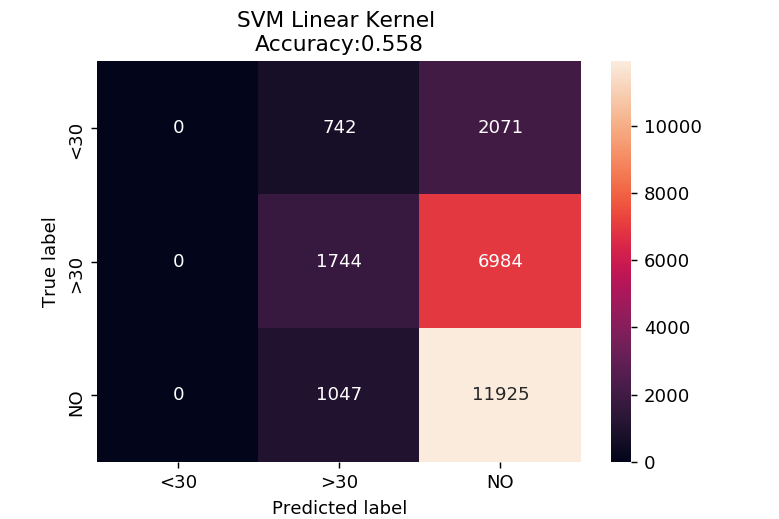

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.35 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.33 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.49      0.20      0.28      8728
          2       0.57      0.92      0.70     12972

avg / total       0.48      0.56      0.47     24513

CPU times: user 11.7 s, sys: 5.47 ms, total: 11.8 s
Wall time: 11.5 s


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf)

## <font color=green>SVM</font>

### <font color=green>optimise over accuracy</font>

In [33]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = LinearSVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000]}  
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs=4)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 10}
Grid best score (accuracy):  0.5618923292402671
CPU times: user 50.5 s, sys: 87.5 ms, total: 50.5 s
Wall time: 2min 58s


In [34]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:7]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,params,rank_test_score
2,0.561892,0.562667,10,{'C': 10},1
1,0.561879,0.562463,1,{'C': 1},2
0,0.560859,0.561539,0.1,{'C': 0.1},3
3,0.547954,0.548539,100,{'C': 100},4
4,0.508492,0.509384,1000,{'C': 1000},5


<IPython.core.display.Javascript object>


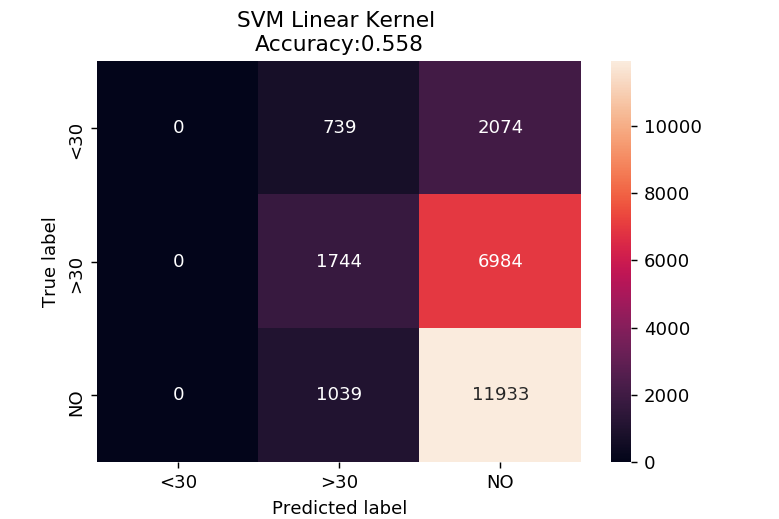

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.35 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.33 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.50      0.20      0.28      8728
          2       0.57      0.92      0.70     12972

avg / total       0.48      0.56      0.47     24513



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
plot_confusion(grid_clf_acc)

In [36]:
y_decision_fn_scores_acc 

array([[-0.7599169 , -0.15256013, -0.08818908],
       [-0.77705764, -0.28128508,  0.05978786],
       [-0.59082982, -0.22301037, -0.21261091],
       ...,
       [-0.7707735 , -0.29916449,  0.07037525],
       [-0.82195989, -0.43979762,  0.24198678],
       [-0.7729999 , -0.17112211, -0.0421249 ]])

In [37]:
# precision recall curve only for binary class